<a href="https://colab.research.google.com/github/machine-perception-robotics-group/MPRGDeepLearningLectureNotebook/blob/master/01_dnn_scratch/Perceptron_AND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 単純パーセプトロンによるAND回路の作成

---

単純パーセプトロンでAND出力ができるように学習してみよう！

まずはライブラリ（numpyとmatplotlib）をimportし、入力データxとその教師ラベルy_trainを設定します．

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 入力データと教師ラベル
x = np.asarray([[0,0],[1,0],[0,1],[1,1]], dtype=np.float)
y_train = np.asarray([0, 0, 0, 1], dtype=np.float)

<ipython-input-14-c6ffbfa2e25f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.asarray([[0,0],[1,0],[0,1],[1,1]], dtype=np.float)
<ipython-input-14-c6ffbfa2e25f>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.asarray([0, 0, 0, 1], dtype=np.float)


## ネットワークモデルの定義
単純パーセプトロンを定義します．

まずはじめに，ネットワークの定義に必要なシグモイド関数を定義します．

In [15]:
# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

上で定義したシグモイド関数を用いてネットワークモデルを作成します．
ここでは，入力層，出力層から構成される単純パーセプトロンを定義することとし，1サンプルのデータを入力して結果を出力するようなネットワークを定義します．

入力層のユニット数は引数として与え，`input_size`とします．
そして，`__init__`関数を用いて，ネットワークのパラメータを初期化します．
`w`は重みで，`b`はバイアスを表しています．
重みは`randn`関数で，標準正規分布に従った乱数で生成した値を保有する配列を生成します．
バイアスは`zeros`関数を用いて，要素が全て0の配列を生成します．

そして，`forward`関数で，データを入力して結果を出力するための演算を定義します．

次に，`backward`関数ではパラメータの更新量を計算します．
まず，ネットワークの出力結果と教師ラベルから，誤差`dy`を算出します．
その後，勾配を計算し，パラメータの更新量を`self.grads`へ保存しておきます．

また，`update_parameters`関数で，更新量をもとにパラメータの更新を行う関数を定義します．ここでは，`backward`関数によって計算した勾配と更新量（`lr`）によって，現在のパラメータを更新します．


In [16]:
# 単純パーセプトロンの定義
class Perceptron:
    
    def __init__(self, input_size, w_std=0.01):
        self.w = w_std * np.random.randn(input_size, 1)
        self.b = 0.0   
        self.grads = {}

    def forward(self, x):
        self.h = np.dot(x, self.w) + self.b
        self.y = sigmoid(self.h)
        return self.y

    def backward(self, x, t): 
        self.grads = {}

        d_h = -1 * (t - self.y) * sigmoid_grad(self.h)
        self.grads['w'] = np.dot(x.T, d_h)
        self.grads['b'] = np.sum(d_h, axis=0)

    def update_parameters(self, lr=0.1):
        self.w -= lr * self.grads['w']
        self.b -= lr * self.grads['b']

入力層２（`input_size = 2`）となるMLPのモデルを作成します。
重みとバイアスの初期値を設定する際に、標準偏差1.0（`w_std=1.0`）の乱数を設定します。
定義した`display_model_parameters`関数により初期値を表示して，重みとバイアスのそれぞれの値を確認しましょう．

In [17]:
# モデルのパラメータを表示
def display_model_parameters(model):
  print("w:", model.w, "b:", model.b)

# モデルの作成
input_size = 2
model = Perceptron(input_size=input_size, w_std=1.0)

# モデルパラメータの初期値を表示
display_model_parameters(model)

w: [[ 1.58923196]
 [-0.63916697]] b: 0.0


## 単純パーセプトロンの学習
作成したネットワークを用いて，学習を行います．
ここでは1サンプルずつデータを入力た場合のその出力結果と教師ラベルから誤差を算出し，パラメータの更新を行います．

各更新において，学習用データと教師データをそれぞれ`input`と`label`とします．
学習モデルに`input`を与えて，分類結果である`y_pred`を取得します．
取得した`y_pred`は精度および誤差を算出するための関数へと入力され，値を保存します．
次に，誤差を`backward`関数で逆伝播し，`update_parameters`でネットワークの更新を行います．

In [18]:
# 学習パラメータの設定
num_train_data = 4
epoch_num = 500
learning_rate = 1.0

epoch_list = []
train_loss_list = []
train_accuracy_list = []

iteration = 0
for epoch in range(1, epoch_num + 1, 1):
    sum_loss = 0.0
    
    for i in range(0, num_train_data, 1):
        input = x[i:i+1]
        label = y_train[i:i+1]

        y_pred = model.forward(input)

        sum_loss += np.sum(np.power(y_pred - label, 2))

        model.backward(input, label.reshape(-1, 1))
        model.update_parameters(lr=learning_rate)
    
    # 学習途中のlossの保存
    epoch_list.append(epoch)
    train_loss_list.append(sum_loss)
    print("epoch: {}, loss: {}".format(epoch, sum_loss))

# モデルのパラメータを表示
display_model_parameters(model)

epoch: 1, loss: 1.144947316410992
epoch: 2, loss: 1.0535889023983016
epoch: 3, loss: 0.980333358896387
epoch: 4, loss: 0.9179172891750044
epoch: 5, loss: 0.8628577140424455
epoch: 6, loss: 0.8134599301592429
epoch: 7, loss: 0.7688188260868305
epoch: 8, loss: 0.7283550048779645
epoch: 9, loss: 0.6916170358753044
epoch: 10, loss: 0.6582109664488096
epoch: 11, loss: 0.6277822817938761
epoch: 12, loss: 0.600013110471098
epoch: 13, loss: 0.5746205465668224
epoch: 14, loss: 0.5513533860079497
epoch: 15, loss: 0.5299881951125995
epoch: 16, loss: 0.5103257242691647
epoch: 17, loss: 0.49218800333118645
epoch: 18, loss: 0.4754160288915598
epoch: 19, loss: 0.45986785092880733
epoch: 20, loss: 0.4454169114587345
epoch: 21, loss: 0.43195055269987304
epoch: 22, loss: 0.41936865412275726
epoch: 23, loss: 0.4075823777007601
epoch: 24, loss: 0.3965130092889255
epoch: 25, loss: 0.386090888441468
epoch: 26, loss: 0.3762544218625564
epoch: 27, loss: 0.3669491775967152
epoch: 28, loss: 0.3581270580028643
e

## 学習推移のグラフ化

上の学習プログラムで保存しておいた誤差をグラフ化します．


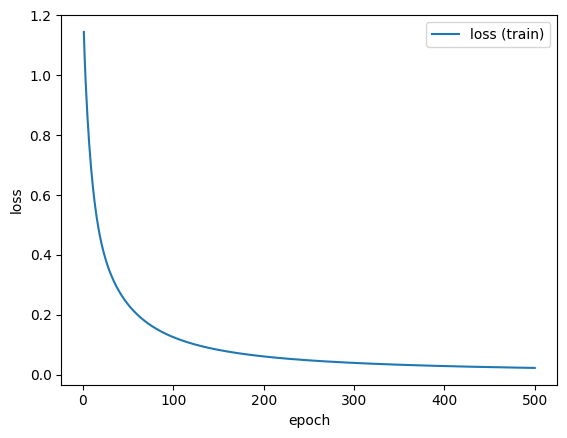

In [19]:
plt.figure()
plt.plot(epoch_list, train_loss_list, label='loss (train)')
plt.xlabel("epoch")     # x軸ラベル
plt.ylabel("loss")      # y軸ラベル
plt.legend()            # 凡例
plt.show()

# 出力の表示
x1とx2の値を生成し，出力結果を可視化します．

**作成した図の保存**

`plt.savefig("保存ファイル名.pdf")`を実行することで，作成した図をファイルとして保存することができます．
この時，ファイル名の拡張子を`.png`や`.jpg`などにすることで，任意のファイルフォーマットで図を保存することができます．
レポートや論文，スライドに使用する図を作成する場合は，ベクタ画像のPDFで保存することをお勧めします．

**Google Colab.上で作成した図のダウンロード**

Google Colab.上で実行している場合，画面左側のフォルダアイコン部分をクリックすることで，Colab.上のファイルを閲覧することが可能となります．
ファイル名右側の「$\vdots$」アイコンをクリックし，ダウンロードを選択することで，作成したPDFを自身のPCへダウンロードすることができます．

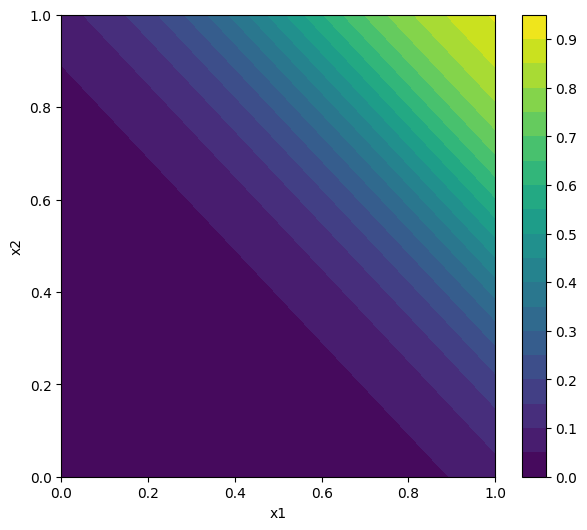

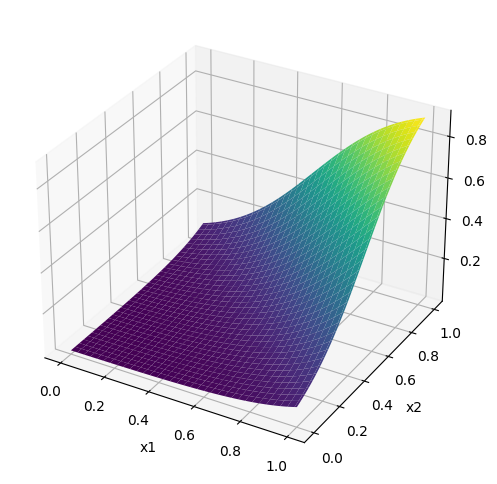

In [20]:
# x1とx2の生成
x1 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
x2 = np.linspace(0, 1, 101)  # [0 0.1 ... 1.0]
X1, X2 = np.meshgrid(x1, x2)

# 入力x1とx2の出力を計算しvalに代入
val = []

for v in x2:
  for u in x1:
    input = u, v
    val.append(model.forward(input))

val = np.asarray(val)
val = val.reshape(X1.shape)

# 等高線表示(PDFにセーブ)     
fig, ax = plt.subplots(figsize=(7,6))
surf = ax.contourf(X1, X2, val, 20, cmap='viridis')
fig.colorbar(surf)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.savefig("Perceptron-2D.pdf")
plt.show()

# 3D表示 (PDFにセーブ)  
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, val, cmap='viridis') 
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.savefig("Perceptron-3D.pdf")
plt.show()

## 課題
1. 学習率 lr の値を変更すると， 学習曲線と重みがどのように変更するか試してみよう
2. バイアス b をbackwardの際に更新しないように変更し学習できるか試してみよう
2. ORの出力を学習するように変更してみよう
3. XORを学習するように変更してみよう
4. 0000~1111を入力し、10進数の値を学習するように変更してみよう
   （input_size = 4, num_train_data = 16）
